In [ ]:
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from pathlib import Path
import plotly.express as px
import geopandas as gpd

In [26]:
# Load csv file Resources/homelesess_2012_2022.xlsx
file_path = Path('../Resources/homelesess_2012_2022.csv')
# Read the csv file
homelesess_df = pd.read_csv(file_path)
# Display data
homelesess_df.head()


,State,"Overall Homeless, 2022","Overall Homeless, 2021","Overall Homeless, 2020","Overall Homeless, 2019","Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012"
0,AK,"2,320","1,949","1,949","1,907","2,016","1,845","1,940","1,956","1,784","1,946","1,913"
1,AL,"3,752","2,556","3,351","3,261","3,434","3,793","4,111","3,970","4,561","4,689","5,209"
2,AR,"2,459","2,139","2,366","2,717","2,712","2,467","2,463","2,560","2,936","3,812","4,214"
3,AS,,,,,,,,,,,
4,AZ,"13,553","5,460","10,979","10,007","9,865","8,947","9,707","9,896","10,495","10,562","11,302"


In [27]:
condition = (homelesess_df['State'] != 'AS')
# Use boolean indexing to select and keep rows that satisfy the condition
homelesess_df_clean = homelesess_df[condition]

#Changing the type for all columns exept State
# Specify the column to keep as object
object_column = 'State'

# Convert all values to float except the specified object column
homelesess_df_clean = homelesess_df_clean.replace(',','', regex = True)
homelesess_df_clean.loc[:, homelesess_df_clean.columns != object_column] = homelesess_df_clean.loc[:, homelesess_df_clean.columns != object_column].apply(pd.to_numeric, errors='coerce')
homelesess_df_clean.head()

,State,"Overall Homeless, 2022","Overall Homeless, 2021","Overall Homeless, 2020","Overall Homeless, 2019","Overall Homeless, 2018","Overall Homeless, 2017","Overall Homeless, 2016","Overall Homeless, 2015","Overall Homeless, 2014","Overall Homeless, 2013","Overall Homeless, 2012"
0,AK,2320,1949,1949,1907,2016,1845,1940,1956,1784,1946,1913
1,AL,3752,2556,3351,3261,3434,3793,4111,3970,4561,4689,5209
2,AR,2459,2139,2366,2717,2712,2467,2463,2560,2936,3812,4214
4,AZ,13553,5460,10979,10007,9865,8947,9707,9896,10495,10562,11302
5,CA,171521,57468,161548,151278,129972,131532,118142,115738,113952,118552,120098


Enter the year in a range 2012 - 2022:  2015


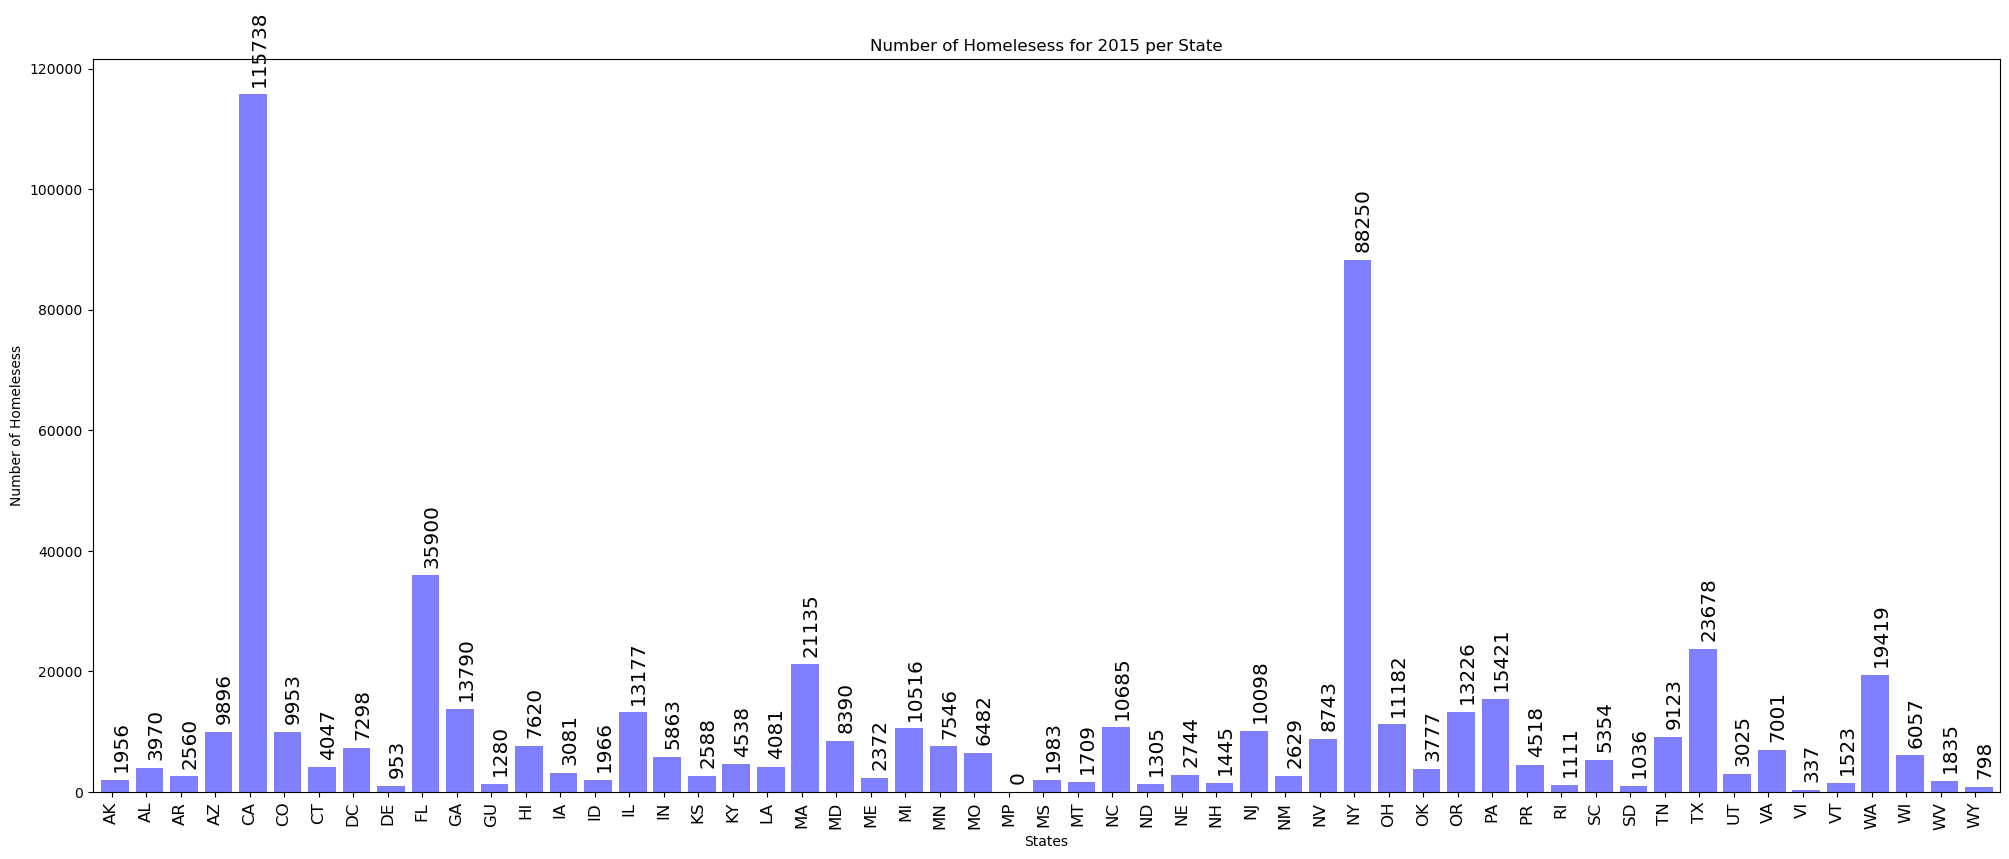

In [28]:
x_axis = np.arange(len(homelesess_df_clean))
value_for_year = input("Enter the year in a range 2012 - 2022: ")
year_value = "Overall Homeless, " + value_for_year
tick_locations = [value + 0.3 for value in x_axis]
plt.figure(figsize=(20,8))
plt.xlim(-0.25, len(x_axis))
plt.bar(x_axis, homelesess_df_clean[year_value], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations , homelesess_df_clean["State"],rotation="vertical",size = 'large')
plt.tight_layout()
y = homelesess_df_clean[year_value]
for index, value in enumerate(y):
    plt.text(index + 0.3, value + 2000,
             str(value), size = 'x-large',rotation="vertical")
plt.title(f"Number of Homelesess for {value_for_year} per State")
plt.xlabel("States")
plt.ylabel("Number of Homelesess")
plt.savefig("../Outputs/HUD_bar_chat.png")
plt.show()

In [29]:
# Set the 'State' to be our index for easy referencing of rows
if 'State' in homelesess_df_clean.columns:
    homelesess_df_clean.set_index("State", inplace=True)
else:
    print("Warning: 'State' column not found in DataFrame.")
    
homelesess_df_yearly = homelesess_df_clean.rename(columns={'Overall Homeless, 2022' : '2022', 'Overall Homeless, 2021': '2021',
       'Overall Homeless, 2020' : '2020', 'Overall Homeless, 2019' : '2019',
       'Overall Homeless, 2018' : '2018', 'Overall Homeless, 2017' : '2017',
       'Overall Homeless, 2016' : '2016', 'Overall Homeless, 2015' : '2015',
       'Overall Homeless, 2014': '2014', 'Overall Homeless, 2013' : '2013',
       'Overall Homeless, 2012': '2012'})
homelesess_df_yearly.to_csv('../Resources/HUD_States_Data.csv')
homelesess_df_yearly.head()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
State,,,,,,,,,,,
AK,2320,1949,1949,1907,2016,1845,1940,1956,1784,1946,1913
AL,3752,2556,3351,3261,3434,3793,4111,3970,4561,4689,5209
AR,2459,2139,2366,2717,2712,2467,2463,2560,2936,3812,4214
AZ,13553,5460,10979,10007,9865,8947,9707,9896,10495,10562,11302
CA,171521,57468,161548,151278,129972,131532,118142,115738,113952,118552,120098


In [30]:
year_array = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

# Specify the columns for which to calculate the sum of homelesess
columns_to_sum = ['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012']

# Calculate the sum for specific columns
specific_column_sums = homelesess_df_yearly[columns_to_sum].sum().loc[::-1]

# Convert the result to a NumPy array
sums_array = np.array(specific_column_sums)
# Create a DataFrame from the arrays
usa_homelesess_df = pd.DataFrame({'Year': year_array , 'Total Number of US homelesess': sums_array})

usa_homelesess_df

,Year,Total Number of US homelesess
0,2012,621553
1,2013,590364
2,2014,576450
3,2015,564708
4,2016,549928
5,2017,550996
6,2018,552830
7,2019,567715
8,2020,580466
9,2021,380630


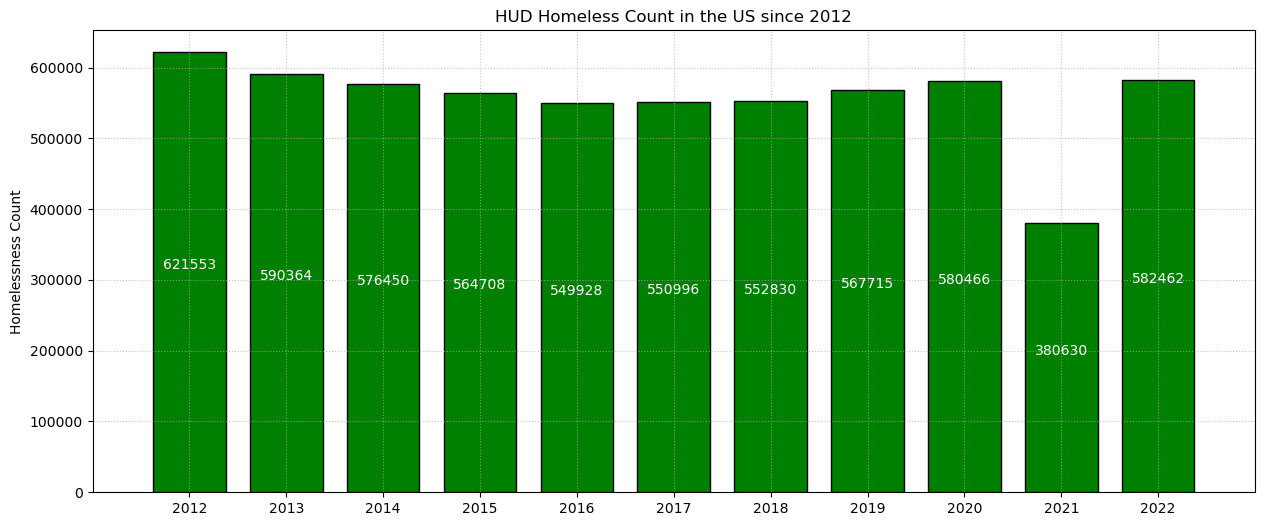

In [31]:
# Homelessness Change in the US since 2012
# Set values for X, Y axis and bar width
fig = plt.figure(figsize=(15,6))
x = usa_homelesess_df["Year"]
y = usa_homelesess_df["Total Number of US homelesess"]
bar_width = 0.75
edgecolor = 'black'

# Plot Bar Chart        
bars = plt.bar(x, y, bar_width, color="g", ec=edgecolor, lw=1)

# Set Graph Properties
plt.ylabel('Homelessness Count')
plt.title('HUD Homeless Count in the US since 2012') 
plt.grid(True,linestyle=':', alpha=0.7)
plt.xlim(2011, x.max()+1)
plt.xticks(x, usa_homelesess_df["Year"])

# Set the bar value inside each bar
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., 0.5*height,
                '%s' % (str(int(height))),
                ha='center', va='bottom', color="white")
# Save the figure
plt.savefig("../Outputs/Homelesess_Summary.png")

# Show graph
plt.show()

In [ ]:
#Enter state code to plot graph
state_value = input('Enter state code : ')
# Collect the homelesess number
average_homelesess = homelesess_df_yearly[[str(year) for year in range(2012, 2023)]].mean()

# Collect the years where data was collected
years = average_homelesess.keys()
# Plot the homelesess values for a single state
state_one = plt.plot(years, homelesess_df_yearly.loc[state_value,["2012","2013","2014","2015","2016","2017",
                                                                  "2018","2019","2020","2021","2022"]],
                                             color="blue",label=homelesess_df_yearly.loc[state_value])

# Create a legend for our chart
#plt.legend(handles=[state_one], loc="best")
plt.legend(title = state_value, loc="best")
plt.title(f"Number of Homelesess for State {value_for_year} per Year")
plt.xlabel("Years")
plt.ylabel("Number of Homelesess")
plt.savefig("../Outputs/HUD_state_graph")
# Show the chart
plt.show()

In [32]:
homelesess_df_yearly.head()

,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012
State,,,,,,,,,,,
AK,2320,1949,1949,1907,2016,1845,1940,1956,1784,1946,1913
AL,3752,2556,3351,3261,3434,3793,4111,3970,4561,4689,5209
AR,2459,2139,2366,2717,2712,2467,2463,2560,2936,3812,4214
AZ,13553,5460,10979,10007,9865,8947,9707,9896,10495,10562,11302
CA,171521,57468,161548,151278,129972,131532,118142,115738,113952,118552,120098


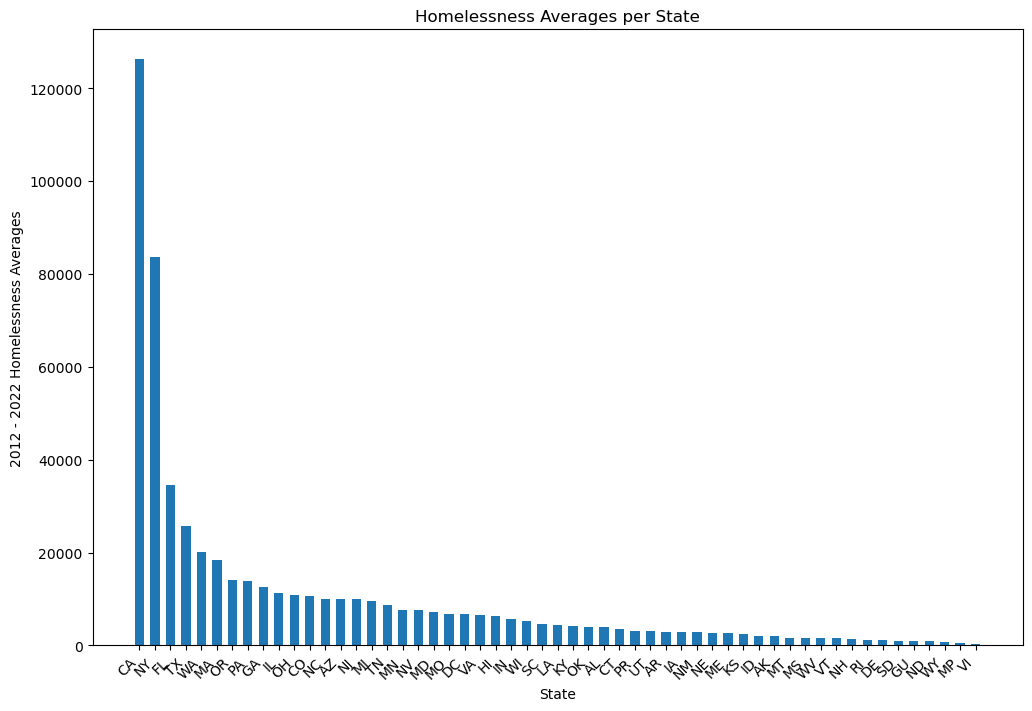

In [44]:

homelesess_df_yearly = homelesess_df_yearly.fillna(0)  


homelessness_averages = homelesess_df_yearly.mean(axis=1).round()


homelessness_averages_df = pd.DataFrame({"2012 - 2022 Homelessness Averages": homelessness_averages, "State": homelesess_df_yearly.index})

homelessness_averages_df = homelessness_averages_df.sort_values(by="2012 - 2022 Homelessness Averages", ascending=False)


fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.6 


bars = ax.bar(homelessness_averages_df["State"], homelessness_averages_df["2012 - 2022 Homelessness Averages"], width=bar_width)

plt.title("Homelessness Averages per State")
plt.xlabel("State")
plt.ylabel("2012 - 2022 Homelessness Averages")


plt.xticks(rotation=45, ha='right')

plt.savefig("../Outputs/homelessness_averages_per_state")

plt.show()


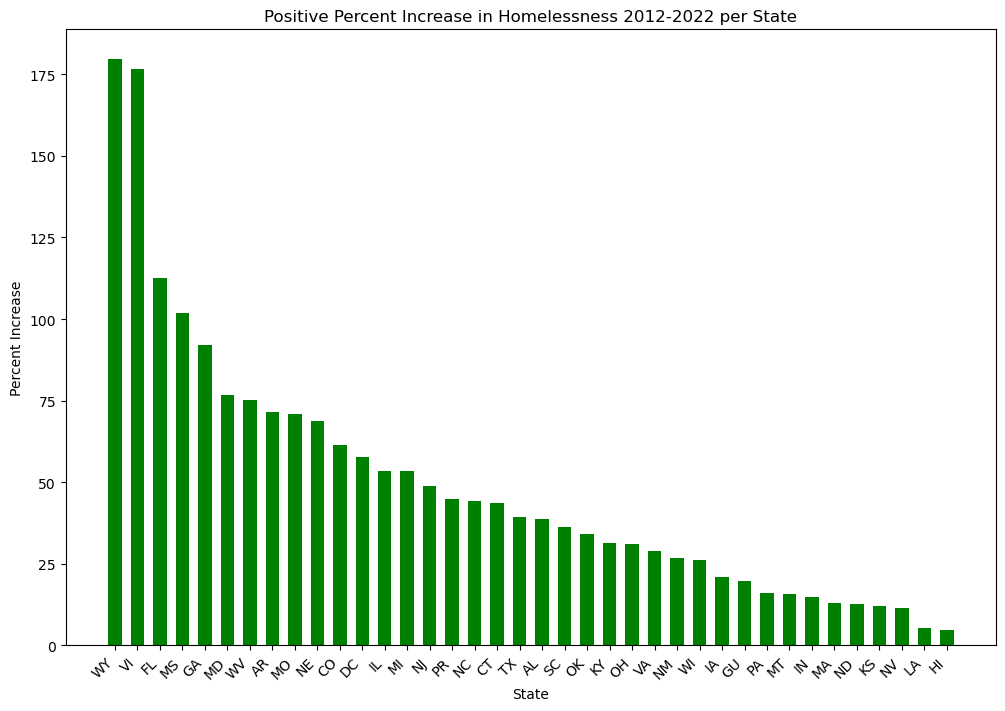

In [42]:

homelesess_df_yearly = homelesess_df_yearly.fillna(0)  # Fill NaN values with 0

percent_increase = ((homelesess_df_yearly.iloc[:, -1] - homelesess_df_yearly.iloc[:, 0]) / homelesess_df_yearly.iloc[:, 0]) * 100

percent_increase_df = pd.DataFrame({"Percent Increase 2012-2022": percent_increase, "State": homelesess_df_yearly.index})


filtered_df = percent_increase_df[percent_increase_df["Percent Increase 2012-2022"] >= 0]

filtered_df = filtered_df.sort_values(by="Percent Increase 2012-2022", ascending=False)


fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.6 

bars = ax.bar(filtered_df["State"], filtered_df["Percent Increase 2012-2022"], width=bar_width, color='green')

plt.title("Positive Percent Increase in Homelessness 2012-2022 per State")
plt.xlabel("State")
plt.ylabel("Percent Increase")


plt.xticks(rotation=45, ha='right')

plt.savefig("../Outputs/positive_percent_increase_homelessness_per_state")

# Show the chart
plt.show()


